In [ ]:
#|default_exp peak_pattern_atlas 

# Peak pattern atlas 

> The forest and the trees

Given our ability to generate theoretical XRF spectra we can now build an atlas of spectra for different chemical elements. In the following we will ignore the exotic Lanthanides and Actinides and further limit our attention to what I call the *Elements Of Interest*. To plot the periodic table instantiate the `PeriodicTable` class and run the `.plot()` method. The edges of pre-selected elements of interest (to me) are colored red.      

In [1]:
from moseley import PeriodicTable, PeakPatternAtlas

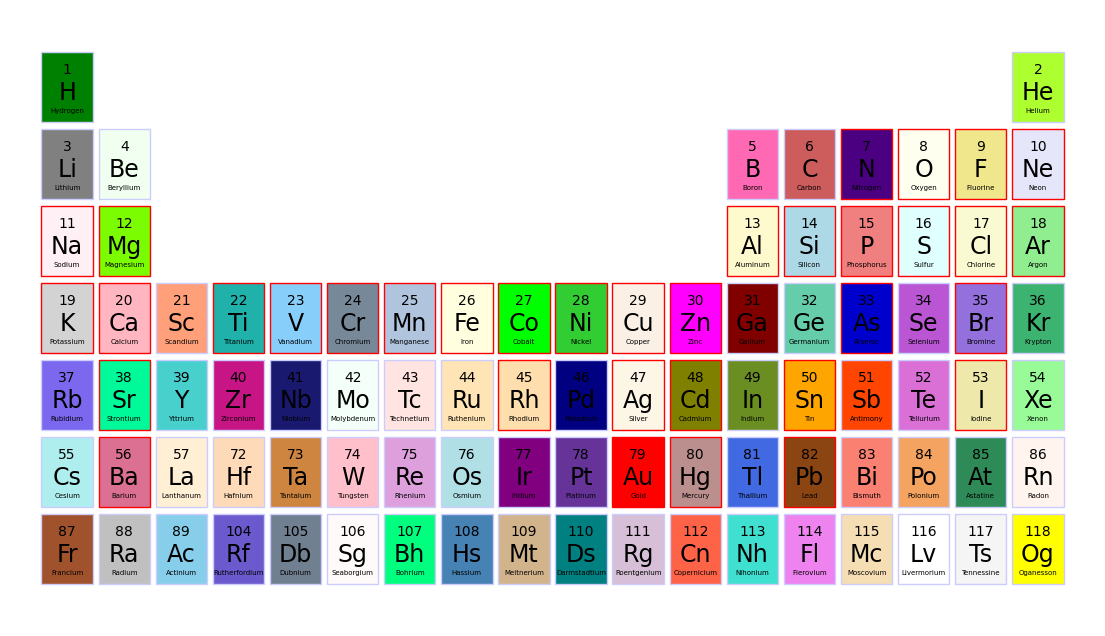

In [2]:
table = PeriodicTable()
table.plot();

We are now in a position to create our atlas of elemental XRF peak patterns...

In [3]:
ppa = PeakPatternAtlas() 

Please wait while computing spectral patterns for 35 elements...
Ready building Peak Pattern Atlas!


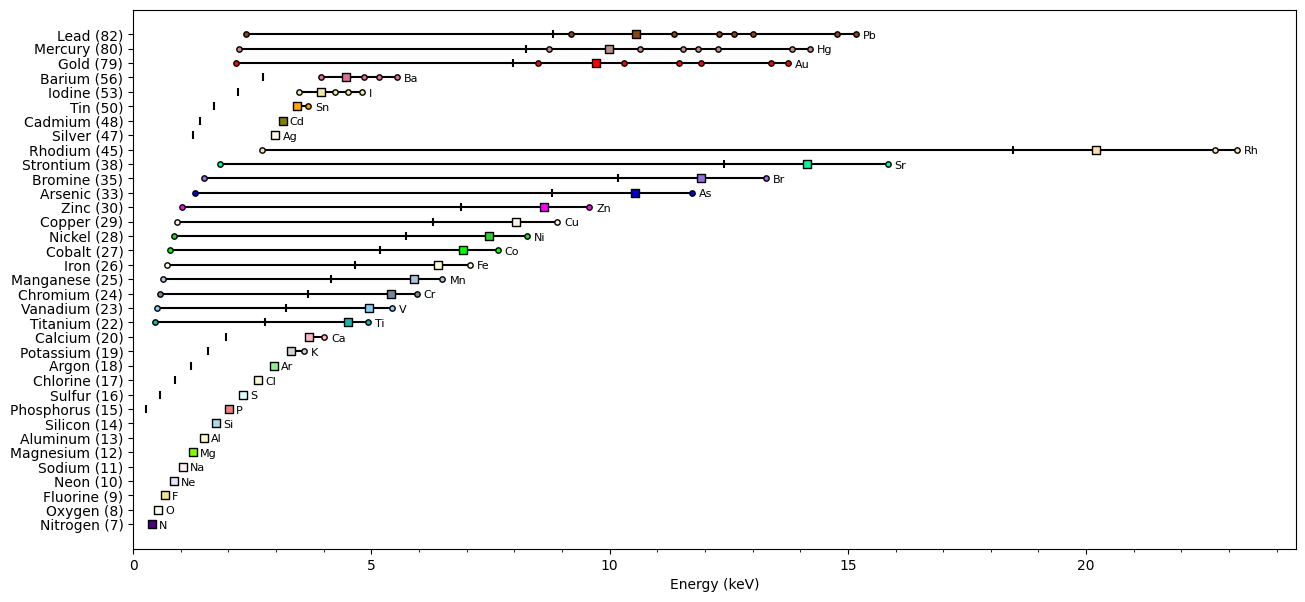

In [4]:
ax = ppa.plot()

## FUNCTIONS 

In [17]:
#|export 

# Periodic Table 
import mendeleev as mv 
from mendeleev.fetch import fetch_table  

import moseley as mos 

# plotting 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import matplotlib.colors as mcolors 


In [23]:
#|export 

class PeakPatternAtlas():
    '''Create a PeakPatternAtlas instance. '''

    def __init__(self, verbose=True): 

        self.table = mos.PeriodicTable()

        self.EOI = [element for element in self.table.EOI if not '#'in element]
        if verbose: 
            print(f'Please wait while computing spectral patterns for {len(self.EOI)} elements...')      
        self.element_xrf_list = [mos.ElementXRF(elem, excitation_energy_keV=25) for elem in self.EOI] 
        self.ptrn_dict_list = [element_xrf.get_pattern_dict() for element_xrf in self.element_xrf_list]
        if verbose: 
            print('Ready building Peak Pattern Atlas!') 
      

    def plot(self, ax=None): 

        if ax is None: 
            fig, ax = plt.subplots(figsize=[15, 7])
        
        n_ptrns = len(self.ptrn_dict_list)
        
        ytick_labels = []
        for i, ptrn_dict in enumerate(self.ptrn_dict_list): 
            elem = ptrn_dict['elem']
            name = ptrn_dict['name']
            Z = ptrn_dict['atomic_number'] 
            color = self.table.element_colors_dict[elem]
        
            ytick_labels.append(f'{name} ({Z})')
            
            mos.plot_pattern(ptrn_dict, ax=ax, offset=i, color=color) 
        
        ax.set_yticks(np.arange(n_ptrns))
        ax.set
        ax.set_yticklabels(ytick_labels)
        ax.set_xlabel('Energy (keV)')
        ax.set_xlim(xmin=0)
        ax.set_xticks(range(25), minor=True);    

        return ax 

def _fetch_table(): 
    '''Utility function wrapper for mendeleev periodic table data.  
    
    Make dataframe with selected element attributes for regular part of the periodic table.
    The irregular Lanthanides and Actinides series are rare, so we do not plot them. 
    
    Returns: ptable_regular (dataframe) 
    '''
    
    #ptable_df = mv.get_table('elements') # mendeleev 0.5 
    ptable_df = fetch_table('elements')
    ptable = ptable_df[['atomic_number', 'symbol', 'name', 'group_id', 'period']]
    is_regular = ~np.isnan(ptable_df['group_id'].values)

    ptable_regular = ptable[is_regular]
    
    return ptable_regular 


def colorize(ptable_regular): 
    '''Generate regular element colors dictionary. 
    
    Returns: element_colors_dict '''
    
    n_regular = len(ptable_regular) # 90 rows 
    
    # see: https://matplotlib.org/stable/gallery/color/named_colors.html 
    css4_dict = mcolors.CSS4_COLORS 
        
    # hack to select brightest colors and exclude american double grays 
    css4_names = list(css4_dict.keys()) 
    css4_names = sorted(sorted(css4_names, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))) # brightest colors 
    css4_names = [name for name in css4_names if 'gray' not in name] # exclude doubles grays 

    # pick brightest 90 
    n_names = len(css4_names) 
    css4_names = css4_names[n_names - n_regular - 1:n_names - 1]

    element_colors_dict = dict(zip(ptable_regular['symbol'], css4_names))

    return element_colors_dict


def _draw_box(ax, element_attrs, edgecolor=None, facecolor=None):
    '''Draw a box for element *element_attrs*  in subplot *ax*. '''
    
    w = 0.9
    h = 0.9
    
    atomic_number, symbol, name, x, y = element_attrs 
    
    if edgecolor is None: 
        edgecolor = [0.8, 0.8, 1.0]
        
    if facecolor is None: 
        facecolor = [0.95, 0.95, 1.0]
    
    rect = mpatches.Rectangle([x - w/2, y - h/2], h, w, edgecolor=edgecolor, facecolor=facecolor)
    ax.add_patch(rect)
    
    ax.annotate(symbol, [x, y], xytext=[0, -4], textcoords='offset points',
                va='center', ha='center', fontsize=17)
    
    ax.annotate(atomic_number, [x, y], xytext=[0, 12], textcoords='offset points', 
                va='center', ha='center', fontsize=10)
    
    ax.annotate(name, [x, y], xytext=[0, -17], textcoords='offset points',
                va='center', ha='center', fontsize=5)


class PeriodicTable(): 
    '''Create a periodic table of elements.'''
    
    
    def __init__(self, EOI=None): 

        if EOI is None: 
            self.EOI = ['#H', '#He', '#Li', '#Be', '#B', '#C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 
                        'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', '#Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 
                        'Co', 'Ni', 'Cu', 'Zn', '#Ga', '#Ge', 'As', '#Se', 'Br', '#Kr', '#Rb', 'Sr', 
                        '#Y', '#Zr', '#Nb', '#Mo', '#Tc', '#Ru', 'Rh', '#Pd', 'Ag', 'Cd', '#In', 'Sn', 
                        '#Sb', '#Te', 'I', '#Xe', '#Cs', 'Ba', '#La', '#Hf', '#Ta', '#W', '#Re', '#Os', 
                        '#Ir', '#Pt', 'Au', 'Hg', '#Tl', 'Pb', '#Bi', '#Po', '#At', '#Rn', '#Fr', '#Ra', 
                        '#Ac', '#Rf', '#Db', '#Sg', '#Bh', '#Hs', '#Mt', '#Ds', '#Rg', '#Cn', '#Nh', 
                        '#Fl', '#Mc', '#Lv', '#Ts', '#Og']    
        else: 
            self.EOI = EOI 
     
    
        # fetch regular part of periodic table 
        self.ptable_regular = _fetch_table() 
    
        # generate element colors dict 
        self.element_colors_dict = colorize(self.ptable_regular) 


    def plot(self, ax=None, figname=None): 
        '''Create periodic table plot with selected elements colorized.'''
    
        if ax is None: 
            fig, ax = plt.subplots(figsize=[14, 8])
        else: 
            fig = ax.get_figure()
            
        ax.invert_yaxis()
    
        for i, element_attrs in enumerate(self.ptable_regular.values): 
    
            atomic_number, symbol, name, x, y = element_attrs 
    
            #facecolor = colorize(symbol)
            facecolor = self.element_colors_dict[symbol] 
            if symbol in self.EOI: 
                edgecolor = 'r' 
            else: 
                edgecolor = None
            _draw_box(ax, element_attrs, edgecolor=edgecolor, facecolor=facecolor)
    
        ax.set_xlim(0, 19)
        ax.set_ylim(8, 0)
        ax.axis('off');
        
        if figname is not None: 
    
            fig.savefig(figname)
    
        return ax